# **K-Nearest Neighbors (KNN)** #

# **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**

Deteksi outlier menggunakan K-Nearest Neighbors (KNN) adalah metode yang sering digunakan dalam Data Understanding untuk mengidentifikasi data yang tidak biasa atau ekstrem dalam suatu dataset. Teknik ini bekerja dengan cara mengukur jarak antara satu titik data dengan tetangganya dan menentukan apakah titik tersebut merupakan outlier berdasarkan pola kedekatan dengan data lainnya.


# **1. Kenapa KNN Bisa Digunakan untuk Deteksi Outlier?**
K-Nearest Neighbors (KNN) bisa digunakan untuk deteksi outlier karena algoritma ini bekerja berdasarkan kedekatan (proximity) antara suatu data dengan data lainnya. Berikut alasan utama mengapa KNN efektif untuk mendeteksi outlier:

Alasan KNN Cocok untuk Deteksi Outlier:

Mengukur Kedekatan Data → Outlier memiliki jarak jauh dari tetangga terdekatnya.
Density-Based Detection → Data dengan kepadatan rendah di antara kelompok padat dianggap outlier.
Local Outlier Factor (LOF) → Mengukur kepadatan relatif suatu titik dibanding tetangganya.
Fleksibel & Non-parametrik → Tidak membutuhkan asumsi distribusi data.
Dapat digunakan untuk data multidimensi tanpa transformasi khusus.

# **2. Langkah-Langkah Deteksi Outlier dengan menggunakan KNN**
1. Tentukan Nilai k
  - Pilih jumlah k tetangga terdekat yang akan digunakan.
  - Nilai k biasanya dipilih berdasarkan eksperimen (misalnya 5 atau 10).
2. Hitung Jarak ke Tetangga Terdekat
  - Gunakan metrik jarak seperti Euclidean, Manhattan, atau Minkowski.
  - Untuk setiap titik data, hitung jarak ke k tetangga terdekatnya.
3. Tentukan Threshold atau Gunakan Local Outlier Factor (LOF)
  - Threshold-Based: Jika jarak rata-rata ke k tetangga terlalu besar, maka titik tersebut dianggap outlier.
  - Local Outlier Factor (LOF): Mengukur kepadatan suatu titik dibandingkan tetangganya, semakin besar nilai LOF, semakin besar kemungkinan titik tersebut adalah outlier.
4. Tandai Outlier
  - Jika nilai LOF atau jarak ke tetangga terdekat melebihi threshold, titik tersebut dianggap sebagai outlier.
5. Evaluasi dan Visualisasi
  - Gunakan scatter plot atau histogram untuk melihat pola outlier.
  - Sesuaikan parameter k jika deteksi kurang akurat.

# **Kesimpulan**  
KNN dapat digunakan untuk mendeteksi outlier dengan menganalisis jarak dan kepadatan data terhadap tetangga terdekatnya. Dengan menghitung jarak ke k tetangga dan membandingkannya dengan threshold atau Local Outlier Factor (LOF), kita dapat mengidentifikasi data yang menyimpang dari pola mayoritas. Metode ini efektif namun bisa menjadi mahal secara komputasi jika dataset besar atau berdimensi tinggi.

In [15]:
%pip install pymysql
%pip install psycopg2

Perintah %pip install pymysql dan %pip install psycopg2 digunakan untuk menginstal pustaka PyMySQL dan Psycopg2, yang masing-masing digunakan untuk berinteraksi dengan database MySQL dan PostgreSQL di Python. Instalasi ini diperlukan agar kode yang menghubungkan dan mengambil data dari kedua database dapat berjalan tanpa error. Jika sudah terinstal sebelumnya, perintah ini tidak perlu dijalankan lagi.

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  1     Iris-setosa          14.0          2.0          51.0         35.0     11.269871         True
  2     Iris-setosa          14.0          2.0          40.9         30.0     11.269871         True
  3     Iris-setosa          13.0          2.0          47.0         32.0      6.496922        False
  4     Iris-setosa          15.0          2.0          46.0         31.0      6.480741        False
  5     Iris-setosa          14.0          2.0          50.0         36.0     10.900000         True
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.374166        False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.316228        False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.223607        False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.360555    

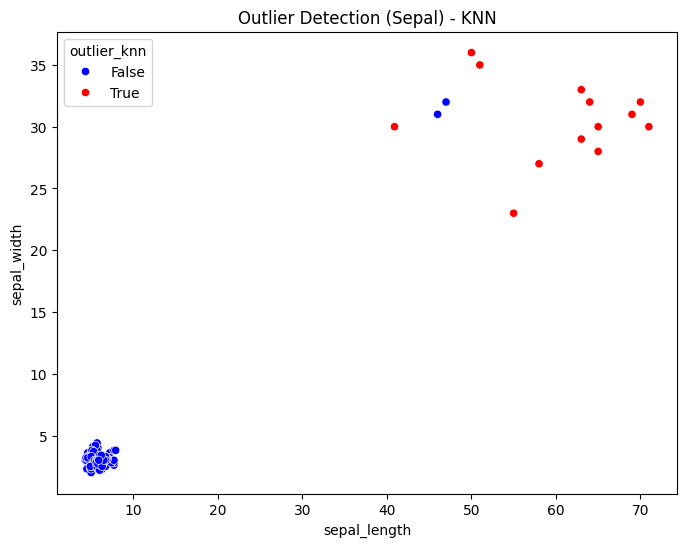

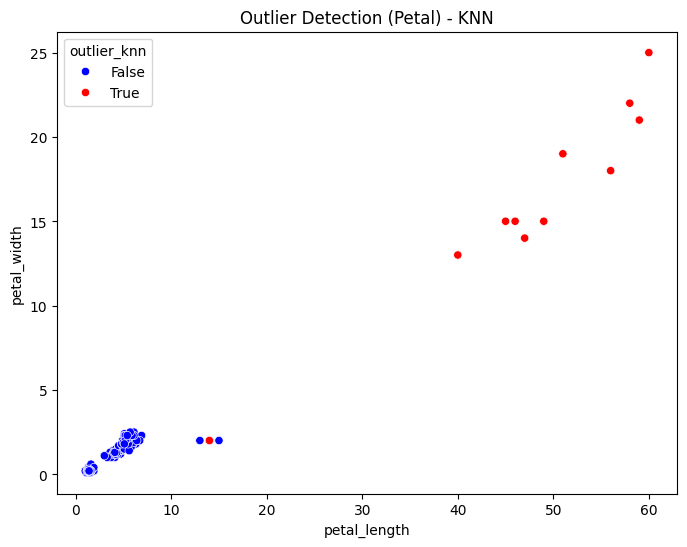

In [18]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-a44046a-postgresqlpendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_OpeN9KvVOC1fGGGCEG-",
        database="defaultdb",
        port=21346
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bilqiz.postgres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-c5ffcaf-mysqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_84u5GTktRvy0MOoNzQD",
        database="bilqizah",
        port=20432
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=5)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Cetak hasil
df_result = df_merged[["id", "class", "petal_length", "petal_width", "sepal_length", "sepal_width", "knn_distance", "outlier_knn"]]
print(df_result.to_string(index=False))
num_outliers = df_merged["outlier_knn"].sum()
print(f"\nJumlah outlier: {num_outliers}")

# Cetak data outlier
outliers = df_merged[df_merged["outlier_knn"]]
print("\nData Outlier:")
print(outliers.to_string(index=False))

# Visualisasi outlier berdasarkan K-NN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal) - KNN")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal) - KNN")
plt.show()

Hasil deteksi outlier dengan K-Nearest Neighbors (K-NN) pada data dari PostgreSQL dan MySQL menunjukkan bahwa beberapa data memiliki jarak yang lebih besar dari threshold (mean + 2 standar deviasi) dan dikategorikan sebagai outlier. Scatter plot memperlihatkan distribusi outlier, dengan titik merah sebagai outlier dan biru sebagai data normal. Jika jumlah outlier besar, kemungkinan terdapat noise atau kesalahan data, sedangkan jika sedikit, data relatif bersih. Outlier yang terdeteksi dapat dianalisis lebih lanjut untuk menentukan apakah disebabkan oleh kesalahan pengukuran atau pola unik dalam dataset.

# **Memisahkan Outlier dari Data**

In [20]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-a44046a-postgresqlpendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_OpeN9KvVOC1fGGGCEG-",
        database="defaultdb",
        port=21346
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bilqiz.postgres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-c5ffcaf-mysqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_84u5GTktRvy0MOoNzQD",
        database="bilqizah",
        port=20432
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa          14.0          2.0          51.0         35.0             -1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa          13.0          2.0          47.0         32.0             -1
  4     Iris-setosa          15.0          2.0          46.0         31.0             -1
  5     Iris-setosa          14.0          2.0          50.0         36.0             -1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode ini bertujuan untuk mendeteksi dan memisahkan outlier dari dataset yang diambil dari PostgreSQL dan MySQL. Proses dimulai dengan menghubungkan kedua basis data menggunakan psycopg2 dan pymysql, lalu mengeksekusi query untuk mengambil data dari tabel "iris_postgresql" dan "irismysql". Data dikonversi menjadi DataFrame dan digabungkan dengan metode inner join berdasarkan kolom "id" dan "class". Selanjutnya, hanya fitur numerik seperti "petal_length", "petal_width", "sepal_length", dan "sepal_width" yang digunakan untuk deteksi outlier menggunakan model Local Outlier Factor (LOF) dengan n_neighbors=90. Model LOF memberi label 1 untuk data normal dan -1 untuk outlier. Hasil deteksi ditambahkan ke dalam DataFrame pada kolom "outlier_label", lalu dataset dipisahkan menjadi data normal (df_filtered) dan outlier (outliers). Hasil akhir menampilkan jumlah total outlier serta daftar data yang tersisa setelah pembersihan, sehingga kualitas data meningkat dan potensi bias dalam analisis dapat dikurangi.

# **Menghitung Akurasi Data**

In [21]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Fitur dan label
X = df_merge[feature_columns]
y = df_merge["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_labels = label_encoder.classes_  # Simpan daftar label sebelum filtering

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merge["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merge[df_merge["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)

# Hanya gunakan label yang ada dalam y_test_all
print(classification_report(y_test_all, y_pred_all, target_names=class_labels[np.unique(y_test_all)]))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)

# Hanya gunakan label yang ada dalam y_test_clean
print(classification_report(y_test_clean, y_pred_clean, target_names=class_labels[np.unique(y_test_clean)]))


Akurasi dengan outlier: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Akurasi tanpa outlier: 0.9259259259259259
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.71      0.83         7
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        27
      macro avg       0.93      0.90      0.91        27
   weighted avg       0.94      0.93      0.92        27



Kode ini dirancang untuk membandingkan akurasi dan hasil klasifikasi model K-Nearest Neighbors (KNN) pada dataset yang mengandung outlier dengan dataset yang telah dibersihkan dari outlier. Proses diawali dengan mengekstrak fitur numerik dari DataFrame gabungan, lalu mengonversi label kelas ke dalam format numerik menggunakan LabelEncoder. Model Local Outlier Factor (LOF) diterapkan dengan parameter n_neighbors=90 dan contamination=0.1, yang mengidentifikasi sekitar 10% data sebagai outlier. Hasil deteksi outlier ditambahkan ke dalam DataFrame, sehingga dataset terbagi menjadi dua versi: satu dengan outlier dan satu yang telah dibersihkan. Selanjutnya, masing-masing dataset dibagi menjadi data latih (80%) dan data uji (20%) menggunakan train_test_split, sehingga diperoleh dua set pelatihan dan pengujian. Model KNN dengan 11 tetangga diterapkan melalui Pipeline yang mencakup standarisasi menggunakan StandardScaler sebelum pelatihan model. Model pertama dilatih menggunakan data dengan outlier, lalu diuji untuk mendapatkan akurasi serta laporan klasifikasi yang mencakup presisi, recall, dan F1-score. Proses yang sama dilakukan pada dataset tanpa outlier. Hasil akhir dari kode ini adalah dua nilai akurasi: satu dari model yang dilatih dengan data mengandung outlier dan satu dari model yang dilatih dengan data bersih. Selain itu, laporan klasifikasi ditampilkan untuk menilai dampak keberadaan outlier terhadap performa model. Secara umum, model yang dilatih pada data tanpa outlier diharapkan memiliki akurasi lebih tinggi, karena outlier dapat mengganggu perhitungan jarak dalam KNN dan mengurangi ketepatan prediksi. Dengan membandingkan kedua hasil ini, pengguna dapat memahami seberapa besar pengaruh outlier terhadap performa klasifikasi serta apakah pembersihan data dapat meningkatkan akurasi model.